In [1]:
import pathlib
from mth5.mth5 import MTH5

2022-07-03 16:29:51,830 [line 144] mt_metadata.setup_logger - INFO: Logging file can be found /home/kkappler/anaconda2/envs/tsvi/lib/python3.9/site-packages/logs/mt_metadata_info.log
2022-07-03 16:29:51,981 [line 144] mt_metadata.base.schema.setup_logger - INFO: Logging file can be found /home/kkappler/anaconda2/envs/tsvi/lib/python3.9/site-packages/logs/metadata_schema.log
2022-07-03 16:29:53,286 [line 135] mth5.setup_logger - INFO: Logging file can be found /home/kkappler/anaconda2/envs/tsvi/lib/python3.9/site-packages/logs/mth5_debug.log
2022-07-03 16:29:53,318 [line 144] mt_metadata.utils.mttime.MTime.setup_logger - INFO: Logging file can be found /home/kkappler/anaconda2/envs/tsvi/lib/python3.9/site-packages/logs/mt_time.log


In [15]:
mth5_path = pathlib.Path("test12rr.h5")
if mth5_path.exists:
    pass
else:
    print("need to get mth5 file")
    print("it can be found under aurora/test/synthetic/data/")
    print("it is also a gzipped attachment on the github issue #1")
    # https://github.com/brunorpinho/tsvi/issues/1

In [3]:
mth5_obj = MTH5(file_version="0.1.0")

In [4]:
mth5_obj.open_mth5(mth5_path, mode="r")

In [5]:
station_1 = mth5_obj.get_station("test1")

In [6]:
station_1

/Survey/Stations/test1:
    |- Group: 001
    -------------
        --> Dataset: ex
        .................
        --> Dataset: ey
        .................
        --> Dataset: hx
        .................
        --> Dataset: hy
        .................
        --> Dataset: hz
        .................
    |- Group: Transfer_Functions
    ----------------------------

In [8]:
run_001 = station_1.get_run("001")
run_001

/Survey/Stations/test1/001:
    --> Dataset: ex
    .................
    --> Dataset: ey
    .................
    --> Dataset: hx
    .................
    --> Dataset: hy
    .................
    --> Dataset: hz
    .................

In [9]:
run_ts = run_001.to_runts()

/home/kkappler/anaconda2/envs/tsvi/lib/python3.9/site-packages/mth5/timeseries/channel_ts.py:80: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  dt_index = pd.date_range(


In [10]:
run_ts

RunTS Summary:
	Station:     test1
	Run:         001
	Start:       1980-01-01T00:00:00+00:00
	End:         1980-01-01T11:06:39+00:00
	Sample Rate: 1.0
	Components:  ['ex', 'ey', 'hx', 'hy', 'hz']

In [11]:
xr_ds = run_ts.dataset
xr_ds

<xarray.Dataset>
Dimensions:  (time: 40000)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-01-01T11:06:39
Data variables:
    ex       (time) int64 -345 1007 -14 2257 167 ... -2201 -1622 -1338 -856 1368
    ey       (time) int64 -1084 909 1377 -644 820 ... 1266 1298 4113 1125 531
    hx       (time) int64 -479 -492 -331 -488 -420 ... -347 -404 -131 -159 -309
    hy       (time) int64 -1047 -1189 -1135 -1366 -1280 ... -839 -916 -800 -1106
    hz       (time) int64 89 82 125 85 134 117 180 ... 220 219 152 220 160 110
Attributes: (12/19)
    channels_recorded_auxiliary:            []
    channels_recorded_electric:             ['ex', 'ex', 'ex', 'ex', 'ex', 'e...
    channels_recorded_magnetic:             ['hx', 'hx', 'hx', 'hx', 'hx', 'h...
    data_logger.firmware.author:            none
    data_logger.firmware.name:              None
    data_logger.firmware.version:           None
    ...                                     ...
    hdf5_reference:                         <HDF5 object reference>
    id:                                     001
    mth5_type:                              Run
    sample_rate:                            1.0
    time_period.end:                        1980-01-01T11:06:39+00:00
    time_period.start:                      1980-01-01T00:00:00+00:00

In [13]:
import matplotlib.pyplot as plt

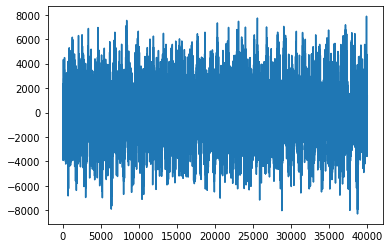

In [14]:
plt.plot(xr_ds.ex)